In [2]:
# Preliminaries
%matplotlib inline
from keras.datasets import reuters
from keras import models
from keras import layers
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# 1.1 Load data
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 3s 1us/step


In [12]:
# Check data
len(train_data), len(test_data)

(8982, 2246)

In [21]:
train_data[0]
min(train_labels), max(train_labels)  # tells us the number of classes

(0, 45)

In [19]:
# decode sequence
word_index = reuters.get_word_index()
reversed_word_index = {v:k for k,v in word_index.items()}
decoded_wires = " ".join([reversed_word_index.get(idx-3,'?') for idx in train_data[0]])
decoded_wires

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [24]:
# 1.2 Encoding the data into one-hot vector
def vectorized_sequences(sequences, dimension=10000):
    # create a matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1  # set specific indices of sequence to 1s
    return results

# Vectorized train_data
x_train = vectorized_sequences(train_data)
# Vectorized test data
x_test = vectorized_sequences(test_data)

x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [29]:
# 1.3 Encoding the labels into one-hot vector
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1
    return results

# Vectorized train_labels
y_train_one_hot = to_one_hot(train_labels)
# Vectorized test labels
y_test_one_hot = to_one_hot(test_labels)

y_train_one_hot[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [30]:
# 1.4 Split into train-val
x_val = x_train[:1000]
y_val = y_train_one_hot[:1000]

partial_x_train = x_train[1000:]
partial_y_train = y_train_one_hot[1000:]

In [42]:
# 2. Create a model/network
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [43]:
# 3. Create opitmizer, loss_function, evaluation_metrics
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [44]:
# 4. Iterate/train/learn
history = model.fit(partial_x_train,
                    partial_y_train,
                    batch_size=512,
                    epochs=9,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 3s 419us/step - loss: 2.5395 - acc: 0.5223 - val_loss: 1.6728 - val_acc: 0.6570
Epoch 2/9
7982/7982 [==============================] - 2s 272us/step - loss: 1.3719 - acc: 0.7124 - val_loss: 1.2755 - val_acc: 0.7220
Epoch 3/9
7982/7982 [==============================] - 2s 204us/step - loss: 1.0145 - acc: 0.7780 - val_loss: 1.1315 - val_acc: 0.7520
Epoch 4/9
7982/7982 [==============================] - 1s 156us/step - loss: 0.7981 - acc: 0.8255 - val_loss: 1.0537 - val_acc: 0.7570
Epoch 5/9
7982/7982 [==============================] - 1s 152us/step - loss: 0.6396 - acc: 0.8624 - val_loss: 0.9767 - val_acc: 0.7930
Epoch 6/9
7982/7982 [==============================] - 1s 160us/step - loss: 0.5113 - acc: 0.8930 - val_loss: 0.9098 - val_acc: 0.8110
Epoch 7/9
7982/7982 [==============================] - 1s 149us/step - loss: 0.4106 - acc: 0.9151 - val_loss: 0.8924 - val_acc: 0.8200
Epoch 8

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


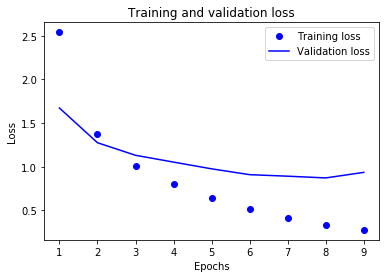

In [45]:
print(history.history.keys())
# 5. Plot loss and accuracy
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['acc']
val_acc = history.history['val_acc']

# Plot loss

epochs = range(1, len(acc) + 1)
# 'bo' means blue dot
plt.plot(epochs, loss, 'bo', label='Training loss')
# 'b' means blue solid
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


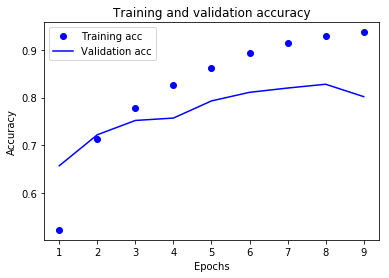

In [46]:
# Plot acc
plt.clf  # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.show()

In [48]:
# Evaluating the model
results = model.evaluate(x_test, y_test_one_hot)
results

2246/2246 [==============================] - 0s 169us/step


[1.0241424485390884, 0.7760463045944832]

In [57]:
# Predict
predictions = model.predict(x_test)
np.argmax(predictions[1]), test_labels[1]

(10, 10)